['anime', 'cartoon', 'human']


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:55<00:00, 54.08it/s]


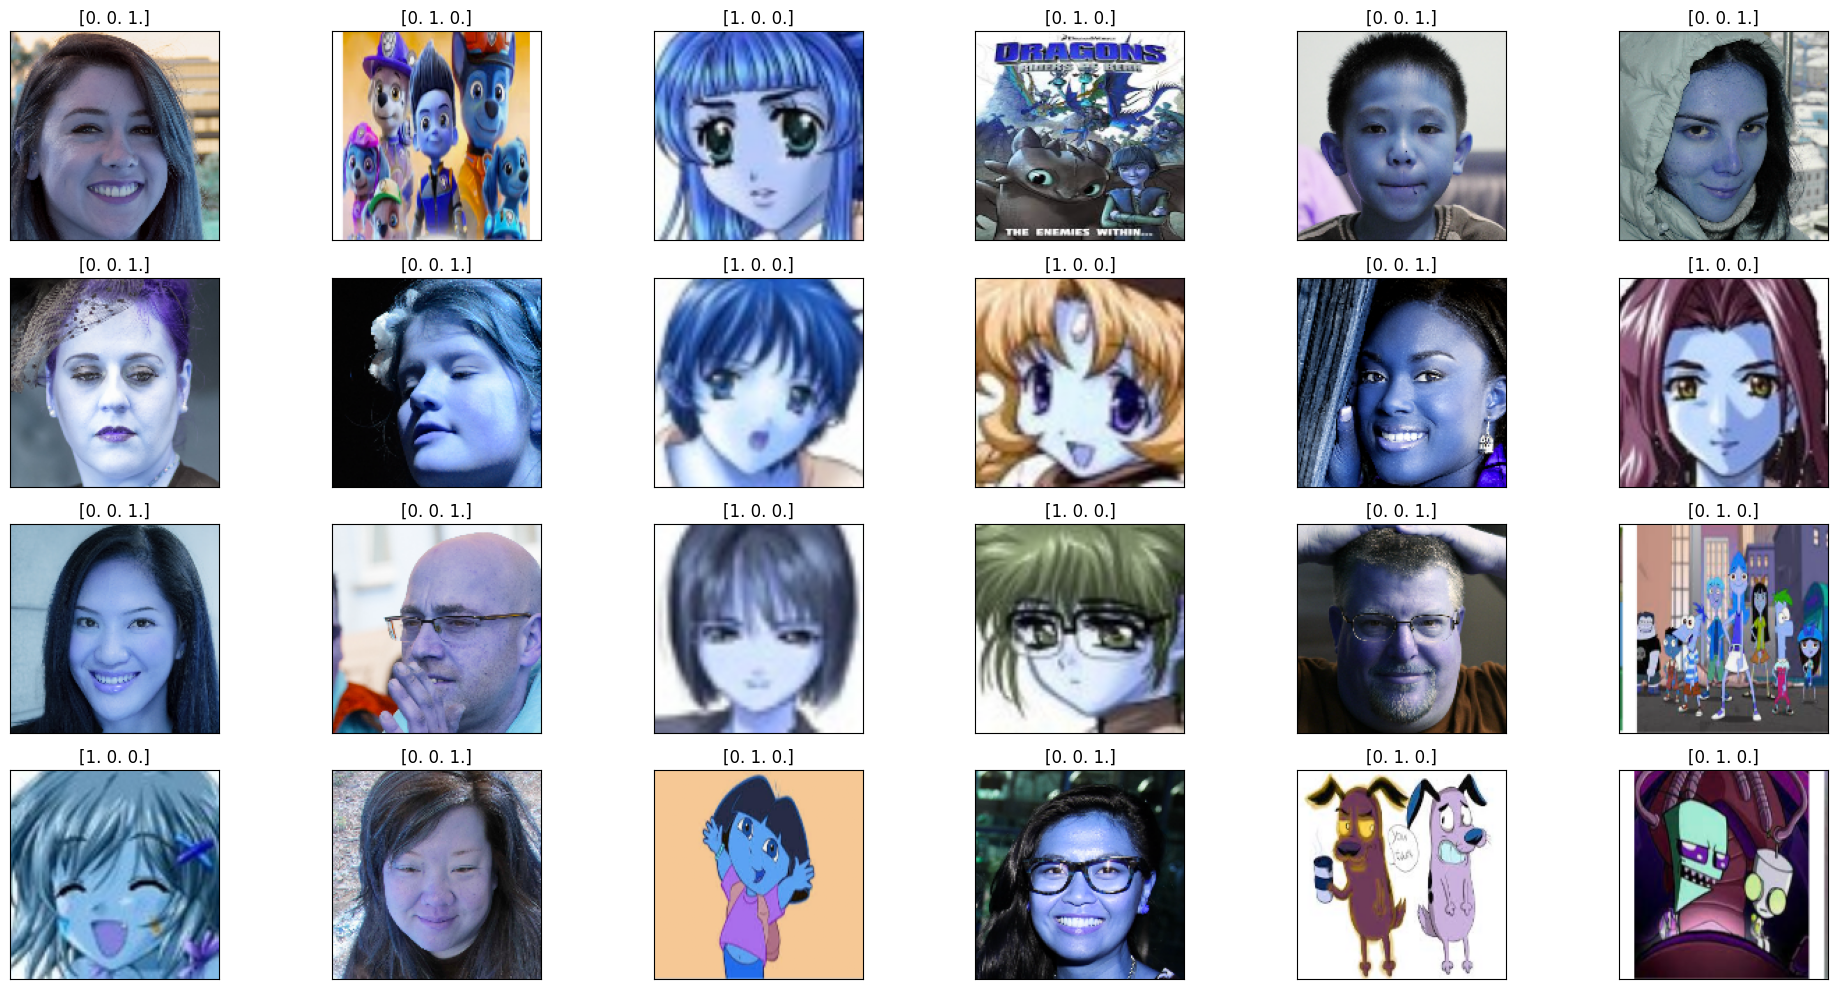

In [1]:
import os
import cv2
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


data_dir = "C:/deep_learning/Data"
print(os.listdir(data_dir))


labels = ['anime', 'cartoon', 'human']


image_size = 150

data = []

for i in labels:
    folderPath = os.path.join("C:/deep_learning/Data",i)
    class_num = labels.index(i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_COLOR)
        img = cv2.resize(img,(image_size,image_size))
        data.append([img,class_num])


X = []
y = []
for features,label in data:
    X.append(features)
    y.append(label)


X = np.array(X)
X.shape
X = X.astype("float32") / 255

y = np.array(y)
y = y.astype("int64")


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=1)


X_train.shape
X_test.shape

X_train = X_train.reshape((8025,150,150,3))
X_test = X_test.reshape((892,150,150,3))
y_train.shape

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


index = np.random.choice(np.arange(len(X_train)),24,replace=False)

fig,axs = plt.subplots(4,6,figsize=(20,10))

for item in zip(axs.ravel(),X_train[index],y_train[index]):
    axs,image,target = item
    axs.imshow(image)
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_title(target)


plt.tight_layout()
plt.show()


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization


CNN = Sequential()
CNN.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(150,150,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.3))

CNN.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))
CNN.add(Flatten())


CNN.add(Dense(512,activation='relu'))
CNN.add(Dense(3,activation='softmax'))
CNN.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
history = CNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)
loss,accuracy = CNN.evaluate(X_test,y_test)
print("testing loss",loss)
print("testing accuracy:",accuracy)

pred = CNN.predict(X_test)



Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 87s 376ms/step - accuracy: 0.9160 - loss: 3.7377 - val_accuracy: 0.3873 - val_loss: 80.7013
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 85s 376ms/step - accuracy: 0.9879 - loss: 0.3154 - val_accuracy: 0.7210 - val_loss: 10.2708
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 85s 377ms/step - accuracy: 0.9926 - loss: 0.1162 - val_accuracy: 0.8281 - val_loss: 8.2207
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 83s 369ms/step - accuracy: 0.9973 - loss: 0.0450 - val_accuracy: 0.9863 - val_loss: 0.2727
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 82s 361ms/step - accuracy: 0.9958 - loss: 0.0448 - val_accuracy: 0.9166 - val_loss: 4.0527
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 80s 353ms/step - accuracy: 0.9949 - loss: 0.1051 - val_accuracy: 0.9838 - val_loss: 0.2893
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 80s 353ms/step - accuracy: 0.9907 - loss: 0.1682 - val_accuracy: 0.9900 - val_loss: 0.1970
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 80s 353ms/step - accuracy: 0.9951 - loss:

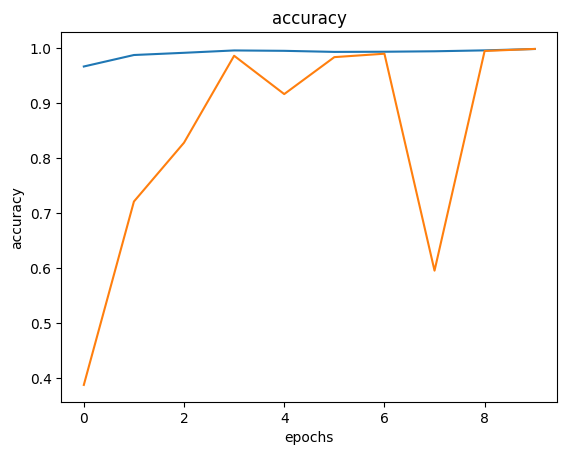

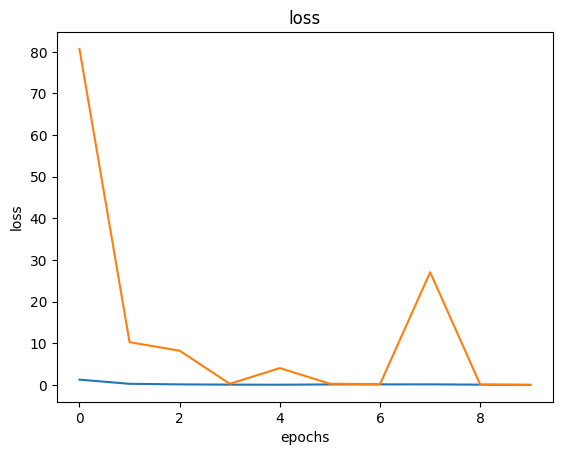

roc score: 99.96895173134413


In [4]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss")
plt.show()

from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,pred)
print("roc score:",roc*100)


